In [2]:
# antonio.neme@iimas.unam.mx
import csv
import pandas as pd

In [3]:
DatosContaminantes=pd.read_csv(r'/content/.../contaminantesV2_2022.csv')
DatosContaminantes = DatosContaminantes.iloc[:, :-1]
#DatosContaminantes.head(100)

In [4]:
# Calcular la cantidad de datos faltantes por estación
datos_faltantes_por_estacion = DatosContaminantes.groupby('id_station')['value'].apply(lambda x: x.isnull().sum()).reset_index()
datos_faltantes_por_estacion = datos_faltantes_por_estacion.rename(columns={'value': 'Numeros de datos faltantes'})
datos_faltantes_por_estacion = datos_faltantes_por_estacion.sort_values(by='Numeros de datos faltantes')
datos_faltantes_por_estacion = datos_faltantes_por_estacion.reset_index(drop=True)
print(datos_faltantes_por_estacion)

   id_station  Numeros de datos faltantes
0         BJU                        1609
1         TLI                        1663
2         CUT                        2060
3         AJU                        2094
4         VIF                        2290
5         UAX                        2756
6         PED                        2855
7         MER                        3191
8         CUA                        3198
9         INN                        3220
10        NEZ                        3649
11        CCA                        4268
12        SAG                        4410
13        FAC                        4512
14        TLA                        4558
15        UIZ                        5032
16        TAH                        5934
17        SFE                        6398
18        IZT                        6613
19        ATI                        7273
20        SAC                        7309
21        CHO                        7466
22        MON                     

In [5]:
# ****************************************************************  1 reto
# Filtrar los datos para la estación 'BJU' y el parámetro 'CO'
filtro = (DatosContaminantes['id_station'] == 'BJU') & (DatosContaminantes['id_parameter'] == 'CO')
#Station_atributo = DatosContaminantes.loc[filtro, ['date', 'value']]
Station_atributo = DatosContaminantes.loc[filtro, ['date', 'value']].reset_index(drop=True)
print(Station_atributo)

                  date  value
0     01/01/2022 01:00    0.8
1     01/01/2022 02:00    0.9
2     01/01/2022 03:00    0.7
3     01/01/2022 04:00    0.8
4     01/01/2022 05:00    1.2
...                ...    ...
3619  31/05/2022 20:00    0.4
3620  31/05/2022 21:00    0.2
3621  31/05/2022 22:00    0.4
3622  31/05/2022 23:00    0.3
3623  31/05/2022 24:00    0.3

[3624 rows x 2 columns]


In [6]:
# normalizacion para CO
co_min = Station_atributo['value'].min()
co_max = Station_atributo['value'].max()
Station_atributo['value2'] = (Station_atributo['value'] - co_min) / (co_max - co_min)
print(Station_atributo)


                  date  value    value2
0     01/01/2022 01:00    0.8  0.333333
1     01/01/2022 02:00    0.9  0.375000
2     01/01/2022 03:00    0.7  0.291667
3     01/01/2022 04:00    0.8  0.333333
4     01/01/2022 05:00    1.2  0.500000
...                ...    ...       ...
3619  31/05/2022 20:00    0.4  0.166667
3620  31/05/2022 21:00    0.2  0.083333
3621  31/05/2022 22:00    0.4  0.166667
3622  31/05/2022 23:00    0.3  0.125000
3623  31/05/2022 24:00    0.3  0.125000

[3624 rows x 3 columns]


In [7]:
# Identificar las celdas faltantes de CO
filas_faltantes = Station_atributo.loc[Station_atributo['value2'].isnull()]
print(filas_faltantes)

# Obtener los índices faltantes
indices_faltantes = filas_faltantes.index
#print(indices_faltantes)

for indice in indices_faltantes:

  indice_anterior=indice-1
  while indice_anterior>=0:
    if pd.notnull(Station_atributo.loc[indice_anterior,'value2']):
        anterior=Station_atributo.loc[indice_anterior,'value2']
        break
    indice_anterior-=1


  indice_posterior=indice+1
  while indice_anterior>=0:
    if pd.notnull(Station_atributo.loc[indice_posterior,'value2']):
        posterior=Station_atributo.loc[indice_posterior,'value2']
        break
    indice_posterior+=1

  Station_atributo.at[indice,'value2']=(anterior + posterior)/2

Station_atributo_falt = Station_atributo.loc[filas_faltantes.index]
print(Station_atributo_falt)


                  date  value  value2
48    03/01/2022 01:00    NaN     NaN
49    03/01/2022 02:00    NaN     NaN
50    03/01/2022 03:00    NaN     NaN
192   09/01/2022 01:00    NaN     NaN
193   09/01/2022 02:00    NaN     NaN
...                ...    ...     ...
3503  26/05/2022 24:00    NaN     NaN
3504  27/05/2022 01:00    NaN     NaN
3505  27/05/2022 02:00    NaN     NaN
3506  27/05/2022 03:00    NaN     NaN
3525  27/05/2022 22:00    NaN     NaN

[182 rows x 3 columns]
                  date  value    value2
48    03/01/2022 01:00    NaN  0.062500
49    03/01/2022 02:00    NaN  0.052083
50    03/01/2022 03:00    NaN  0.046875
192   09/01/2022 01:00    NaN  0.145833
193   09/01/2022 02:00    NaN  0.177083
...                ...    ...       ...
3503  26/05/2022 24:00    NaN  0.041670
3504  27/05/2022 01:00    NaN  0.041668
3505  27/05/2022 02:00    NaN  0.041667
3506  27/05/2022 03:00    NaN  0.041667
3525  27/05/2022 22:00    NaN  0.062500

[182 rows x 3 columns]


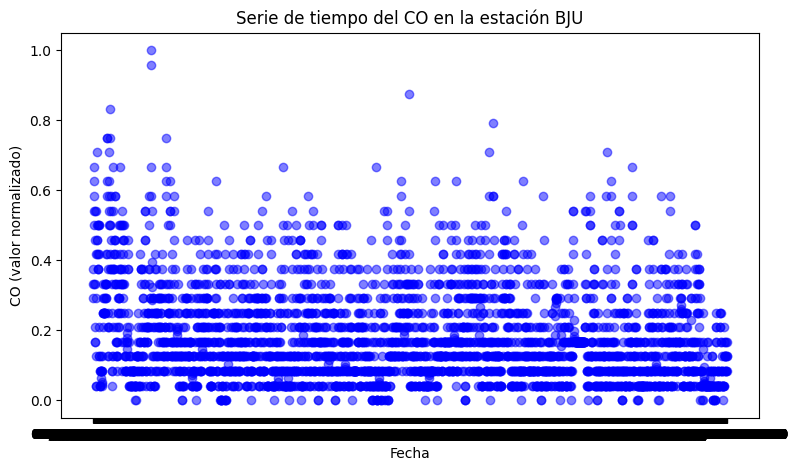

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 5))
# Graficar la serie de tiempo
ax.scatter(Station_atributo['date'], Station_atributo['value2'], color='blue',alpha=0.5)
ax.set_xlabel('Fecha')
ax.set_ylabel('CO (valor normalizado)')
ax.set_title('Serie de tiempo del CO en la estación BJU')
#plt.xticks(rotation=45)
plt.show()


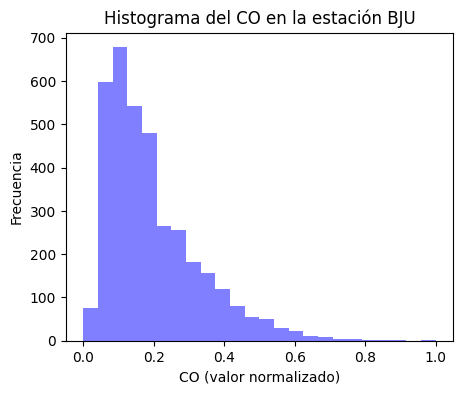

In [9]:
fig, ax = plt.subplots(figsize=(5, 4))

# Crear el histograma
ax.hist(Station_atributo['value2'], bins=24, color='blue', alpha=0.5)
ax.set_xlabel('CO (valor normalizado)')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma del CO en la estación BJU')
plt.show()


In [10]:
# Horas anómalas en CO utilizando la Unidad Tipificada (UT)
media = Station_atributo['value2'].mean()
print('Media: ',media)
desviacion_estandar = Station_atributo['value2'].std()
print('Desviacion Estándar: ',desviacion_estandar)

Station_atributo['UT'] = (Station_atributo['value2'] - media) / desviacion_estandar

# Cantidad de desviaciones estándar consideras como anómalo
umbral_superior = 3.5
umbral_inferior = -1.3

horas_anomalas = Station_atributo.loc[(Station_atributo['UT'] > umbral_superior) | (Station_atributo['UT'] < umbral_inferior)]
print(Station_atributo)
#print(horas_anomalas['date'])


Media:  0.17559447288074592
Desviacion Estándar:  0.13332443152302936
                  date  value    value2        UT
0     01/01/2022 01:00    0.8  0.333333  1.183120
1     01/01/2022 02:00    0.9  0.375000  1.495641
2     01/01/2022 03:00    0.7  0.291667  0.870600
3     01/01/2022 04:00    0.8  0.333333  1.183120
4     01/01/2022 05:00    1.2  0.500000  2.433204
...                ...    ...       ...       ...
3619  31/05/2022 20:00    0.4  0.166667 -0.066963
3620  31/05/2022 21:00    0.2  0.083333 -0.692005
3621  31/05/2022 22:00    0.4  0.166667 -0.066963
3622  31/05/2022 23:00    0.3  0.125000 -0.379484
3623  31/05/2022 24:00    0.3  0.125000 -0.379484

[3624 rows x 4 columns]


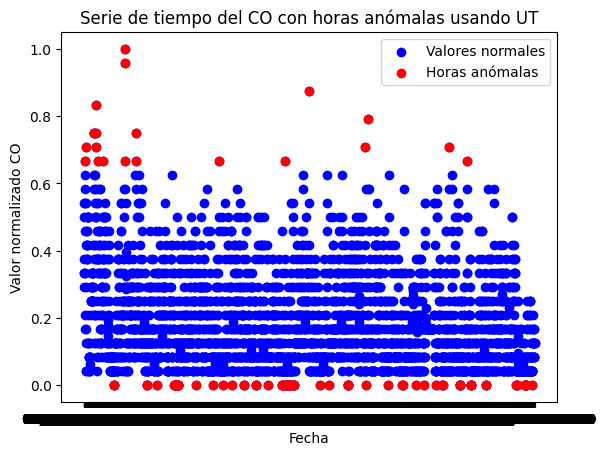

In [11]:
# Graficar la serie de tiempo completa
plt.scatter(Station_atributo['date'], Station_atributo['value2'], color='blue', label='Valores normales')

# Graficar las horas anómalas en rojo
plt.scatter(horas_anomalas['date'], horas_anomalas['value2'], color='red', label='Horas anómalas')
plt.xlabel('Fecha')
plt.ylabel('Valor normalizado CO')
plt.title('Serie de tiempo del CO con horas anómalas usando UT')
plt.legend()
plt.xticks(rotation=0)
plt.show()


In [12]:
# mediana de la variable CO
median = Station_atributo['value2'].median()
print('la mediana: ',median)

# mediana absoluta desviada (MAD) de CO
MAD = Station_atributo['value2'].mad()
print('la mediana absoluta desviada: ',MAD)

# Calcular los Modified Z-Scores para CO
zscores = (Station_atributo['value2'] - median) / MAD

# Calcular la UT modificada para CO
Station_atributo['UTmodify'] = 0.6745 * zscores

# Cantidad de desviaciones estándar consideras como anómalo
umbral_superior = 3.5
umbral_inferior = -1.3

horas_anomalas = Station_atributo.loc[(Station_atributo['UTmodify'] > umbral_superior) | (Station_atributo['UTmodify'] < umbral_inferior)]
print(Station_atributo)


la mediana:  0.125
la mediana absoluta desviada:  0.10301017950131194
                  date  value    value2        UT  UTmodify
0     01/01/2022 01:00    0.8  0.333333  1.183120  1.364145
1     01/01/2022 02:00    0.9  0.375000  1.495641  1.636974
2     01/01/2022 03:00    0.7  0.291667  0.870600  1.091316
3     01/01/2022 04:00    0.8  0.333333  1.183120  1.364145
4     01/01/2022 05:00    1.2  0.500000  2.433204  2.455461
...                ...    ...       ...       ...       ...
3619  31/05/2022 20:00    0.4  0.166667 -0.066963  0.272829
3620  31/05/2022 21:00    0.2  0.083333 -0.692005 -0.272829
3621  31/05/2022 22:00    0.4  0.166667 -0.066963  0.272829
3622  31/05/2022 23:00    0.3  0.125000 -0.379484  0.000000
3623  31/05/2022 24:00    0.3  0.125000 -0.379484  0.000000

[3624 rows x 5 columns]


<ipython-input-12-f8d25cb90451>:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  MAD = Station_atributo['value2'].mad()


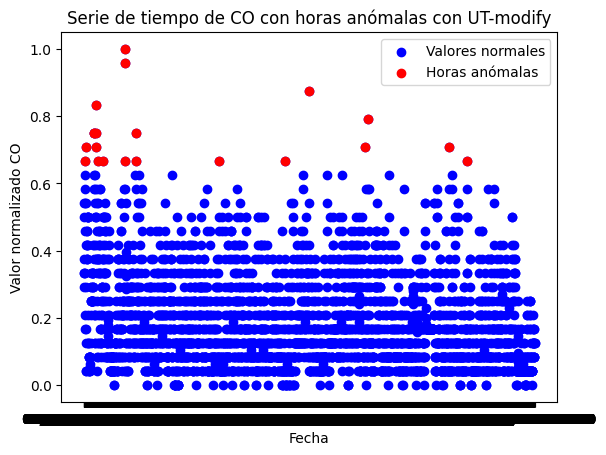

In [13]:
# Graficar la serie de tiempo completa
plt.scatter(Station_atributo['date'], Station_atributo['value2'], color='blue', label='Valores normales')

# Graficar las horas anómalas en rojo
plt.scatter(horas_anomalas['date'], horas_anomalas['value2'], color='red', label='Horas anómalas')

# Establecer etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor normalizado CO')
plt.title('Serie de tiempo de CO con horas anómalas con UT-modify')

# Mostrar leyenda
plt.legend()

# Rotar etiquetas del eje x para una mejor visualización
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

In [14]:
# Filtrar los datos para la estación 'BJU'
parametros = ['CO', 'NO','NO2', 'SO2']  # Lista de valores de id_parameter que deseas seleccionar
filtro = (DatosContaminantes['id_station'] == 'BJU') & (DatosContaminantes['id_parameter'].isin(parametros))
estacion = DatosContaminantes.loc[filtro].reset_index(drop=True)

print(estacion)

                   date id_station id_parameter  value
0      01/01/2022 01:00        BJU           CO    0.8
1      01/01/2022 01:00        BJU          NO2   31.0
2      01/01/2022 01:00        BJU          SO2    1.0
3      01/01/2022 02:00        BJU           CO    0.9
4      01/01/2022 02:00        BJU          NO2   32.0
...                 ...        ...          ...    ...
10867  31/05/2022 23:00        BJU          NO2   26.0
10868  31/05/2022 23:00        BJU          SO2    1.0
10869  31/05/2022 24:00        BJU           CO    0.3
10870  31/05/2022 24:00        BJU          NO2   22.0
10871  31/05/2022 24:00        BJU          SO2    1.0

[10872 rows x 4 columns]


In [15]:
# Normalizar los parámetros
# Crear un diccionario para almacenar los valores máximo y mínimo por parámetro
valores_maximos = {}
valores_minimos = {}

# Obtener los valores máximo y mínimo para cada parámetro
for parametro in estacion['id_parameter'].unique():
    filtro_parametro = estacion['id_parameter'] == parametro
    valores_parametro = estacion.loc[filtro_parametro, 'value']
    valor_maximo = valores_parametro.max()
    valor_minimo = valores_parametro.min()
    valores_maximos[parametro] = valor_maximo
    valores_minimos[parametro] = valor_minimo

# Normalizar los valores para cada parámetro
for parametro in estacion['id_parameter'].unique():
    filtro_parametro = estacion['id_parameter'] == parametro
    valor_maximo = valores_maximos[parametro]
    valor_minimo = valores_minimos[parametro]
    estacion.loc[filtro_parametro, 'value_norm'] = (estacion.loc[filtro_parametro, 'value'] - valor_minimo) / (valor_maximo - valor_minimo)

# Mostrar el DataFrame con los valores normalizados
print(estacion)


                   date id_station id_parameter  value  value_norm
0      01/01/2022 01:00        BJU           CO    0.8    0.333333
1      01/01/2022 01:00        BJU          NO2   31.0    0.373333
2      01/01/2022 01:00        BJU          SO2    1.0    0.018182
3      01/01/2022 02:00        BJU           CO    0.9    0.375000
4      01/01/2022 02:00        BJU          NO2   32.0    0.386667
...                 ...        ...          ...    ...         ...
10867  31/05/2022 23:00        BJU          NO2   26.0    0.306667
10868  31/05/2022 23:00        BJU          SO2    1.0    0.018182
10869  31/05/2022 24:00        BJU           CO    0.3    0.125000
10870  31/05/2022 24:00        BJU          NO2   22.0    0.253333
10871  31/05/2022 24:00        BJU          SO2    1.0    0.018182

[10872 rows x 5 columns]


In [16]:
# Identificar las celdas faltantes de CO
filas_faltantes = estacion.loc[estacion['value_norm'].isnull()]
print(filas_faltantes)

# Obtener los índices de las filas faltantes
indices_faltantes = filas_faltantes.index
#print(indices_faltantes)

for indice in indices_faltantes:

  indice_anterior=indice-1
  while indice_anterior>=0:
    if pd.notnull(estacion.loc[indice_anterior,'value_norm']):
        anterior=estacion.loc[indice_anterior,'value_norm']
        break
    indice_anterior-=1


  indice_posterior=indice+1
  while indice_anterior>=0:
    if pd.notnull(estacion.loc[indice_posterior,'value_norm']):
        posterior=estacion.loc[indice_posterior,'value_norm']
        break
    indice_posterior+=1

  estacion.at[indice,'value_norm']=(anterior + posterior)/2

# Utiliza el método 'loc' para filtrar los índices deseados
estacion_falt = estacion.loc[filas_faltantes.index]

# Imprime el DataFrame filtrado
print(estacion_falt)


                   date id_station id_parameter  value  value_norm
144    03/01/2022 01:00        BJU           CO    NaN         NaN
145    03/01/2022 01:00        BJU          NO2    NaN         NaN
146    03/01/2022 01:00        BJU          SO2    NaN         NaN
147    03/01/2022 02:00        BJU           CO    NaN         NaN
148    03/01/2022 02:00        BJU          NO2    NaN         NaN
...                 ...        ...          ...    ...         ...
10519  27/05/2022 03:00        BJU          NO2    NaN         NaN
10520  27/05/2022 03:00        BJU          SO2    NaN         NaN
10575  27/05/2022 22:00        BJU           CO    NaN         NaN
10576  27/05/2022 22:00        BJU          NO2    NaN         NaN
10577  27/05/2022 22:00        BJU          SO2    NaN         NaN

[639 rows x 5 columns]
                   date id_station id_parameter  value  value_norm
144    03/01/2022 01:00        BJU           CO    NaN    0.029924
145    03/01/2022 01:00        BJU    

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [18]:
X = estacion['value_norm'].values.reshape(-1, 1)

k = 4  # Número de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
centroides = kmeans.cluster_centers_

# Obtener los centroides
centroides = kmeans.cluster_centers_
print(centroides)

etiquetas = kmeans.labels_
estacion['cluster'] = etiquetas

print(estacion)

[[0.04947584]
 [0.35897589]
 [0.17897407]
 [0.58378681]]
                   date id_station id_parameter  value  value_norm  cluster
0      01/01/2022 01:00        BJU           CO    0.8    0.333333        1
1      01/01/2022 01:00        BJU          NO2   31.0    0.373333        1
2      01/01/2022 01:00        BJU          SO2    1.0    0.018182        0
3      01/01/2022 02:00        BJU           CO    0.9    0.375000        1
4      01/01/2022 02:00        BJU          NO2   32.0    0.386667        1
...                 ...        ...          ...    ...         ...      ...
10867  31/05/2022 23:00        BJU          NO2   26.0    0.306667        1
10868  31/05/2022 23:00        BJU          SO2    1.0    0.018182        0
10869  31/05/2022 24:00        BJU           CO    0.3    0.125000        2
10870  31/05/2022 24:00        BJU          NO2   22.0    0.253333        2
10871  31/05/2022 24:00        BJU          SO2    1.0    0.018182        0

[10872 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
distancias = kmeans.transform(X)  # Calcular las distancias de cada valor a todos los centroides
estacion['distancia'] = distancias.min(axis=1)  # Obtener la distancia mínima de cada valor a su centroide
print(estacion)
umbral = 0.3
horas_anomalas = estacion.loc[(estacion['distancia'] > umbral)]
#print(horas_anomalas)

                   date id_station id_parameter  value  value_norm  cluster  \
0      01/01/2022 01:00        BJU           CO    0.8    0.333333        1   
1      01/01/2022 01:00        BJU          NO2   31.0    0.373333        1   
2      01/01/2022 01:00        BJU          SO2    1.0    0.018182        0   
3      01/01/2022 02:00        BJU           CO    0.9    0.375000        1   
4      01/01/2022 02:00        BJU          NO2   32.0    0.386667        1   
...                 ...        ...          ...    ...         ...      ...   
10867  31/05/2022 23:00        BJU          NO2   26.0    0.306667        1   
10868  31/05/2022 23:00        BJU          SO2    1.0    0.018182        0   
10869  31/05/2022 24:00        BJU           CO    0.3    0.125000        2   
10870  31/05/2022 24:00        BJU          NO2   22.0    0.253333        2   
10871  31/05/2022 24:00        BJU          SO2    1.0    0.018182        0   

       distancia  
0       0.025643  
1       0.014

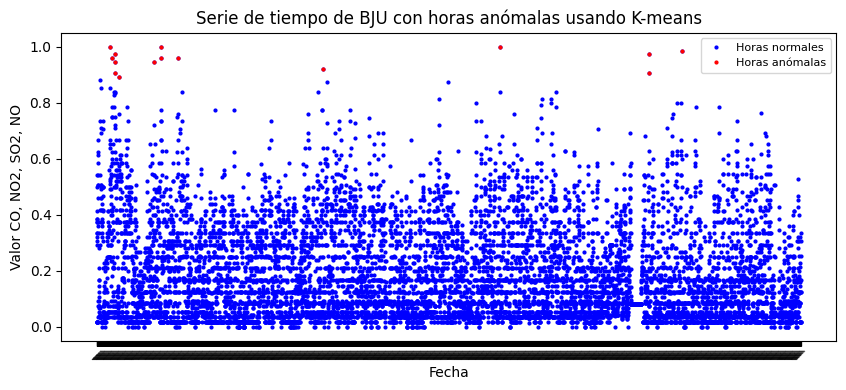

In [20]:
plt.figure(figsize=(10, 4))
# Graficar la serie de tiempo completa
plt.plot(estacion['date'], estacion['value_norm'], color='blue', marker='o', linestyle='', markersize=2, label='Horas normales')
# Graficar las horas anómalas
plt.plot(horas_anomalas['date'], horas_anomalas['value_norm'], color='red', marker='o', linestyle='', markersize=2, label='Horas anómalas')

plt.xlabel('Fecha')
plt.ylabel('Valor CO, NO2, SO2, NO')
plt.title('Serie de tiempo de BJU con horas anómalas usando K-means')
plt.legend(loc='upper right',fontsize=8)
plt.xticks(rotation=45,fontsize=0.5)
plt.show()

In [21]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [22]:
nuevo_df = pd.DataFrame(columns=['CO','SO2','NO2'])
tipos_contaminantes = estacion['id_parameter'].unique()

for contaminante in tipos_contaminantes:
    filtro = estacion['id_parameter'] == contaminante
    contaminante_valores = estacion.loc[filtro, 'value_norm']
    nuevo_df[contaminante] = contaminante_valores.values

scaler = StandardScaler()
for contaminante in tipos_contaminantes:
    contaminante_valores = nuevo_df[contaminante].values.reshape(-1, 1)
    contaminante_estandarizado = scaler.fit_transform(contaminante_valores)
    nuevo_df[contaminante] = contaminante_estandarizado.flatten()

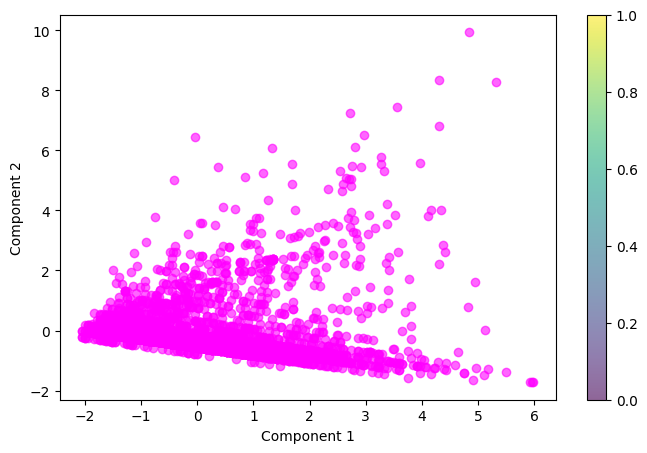

In [23]:
pca = PCA(n_components=2)
pca.fit(nuevo_df)
df_pca = pca.transform(nuevo_df)

fig, ax = plt.subplots(figsize=(8,5))
scatter = ax.scatter(df_pca[:,0], df_pca[:,1], c='fuchsia',  alpha=0.6)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.colorbar(scatter)
plt.show()


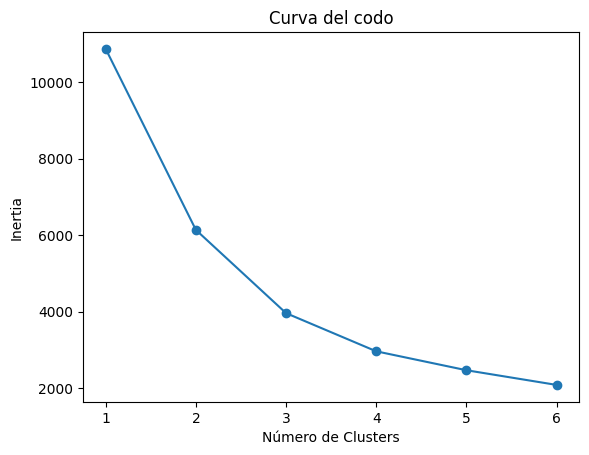

In [24]:
def curva_codo(data, max_clusters):
    inertia = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    # grafica para la curva del codo
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inertia')
    plt.title('Curva del codo')
    plt.show()

curva_codo(nuevo_df, 6)

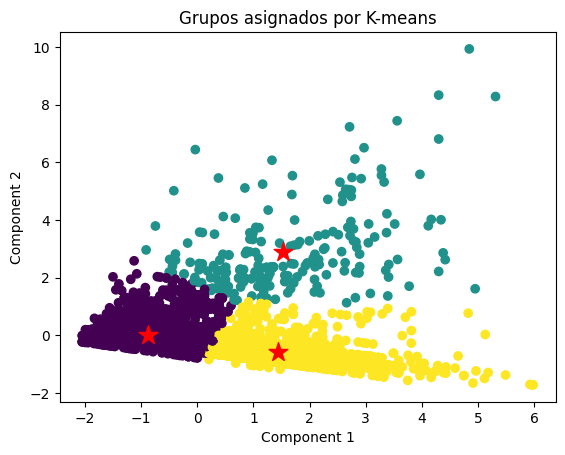

In [25]:
# Ajustar el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(df_pca)
grupos = kmeans.labels_
centroides = kmeans.cluster_centers_

# Graficar
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=grupos, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker='*', s=200, c='red')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Grupos asignados por K-means')
plt.show()


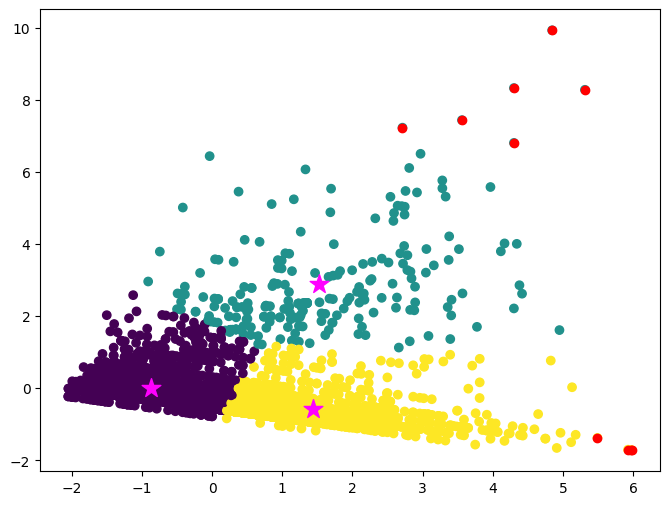

In [27]:
# Calcular las distancias entre los puntos y los centroides
distancias = cdist(df_pca, centroides, 'euclidean')
distancias = np.min(distancias, axis=1)
umbral = 4
puntos_anomalos = df_pca[distancias > umbral]
#print(puntos_anomalos)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_pca[:, 0], df_pca[:, 1], c=grupos, cmap='viridis')
ax.scatter(centroides[:, 0], centroides[:, 1], marker='*', s=200, color='fuchsia')
ax.scatter(puntos_anomalos[:,0], puntos_anomalos[:,1], color='red')
plt.show()
